In [1]:
import os
import numpy as np
import data.data_selector as ds
import utils.plot_functions as pf
import utils.data_processing as dp
import models.model_picker as mp
from data.dataset import Dataset
import pickle
import utils.rate_distortion as rd
import imageio
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/sanborn/projects/DeepSparseCoding/utils/rate_distortion.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sanborn/virtual_envs/py3/lib/python3.4/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sanborn/virtual_envs/py3/lib/python3.4/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sanborn/virtual_envs/py3/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.in

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
with np.load('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/coeffs/lca_256_l0_2.5_v1.0_weights.npz') as d:
    weights = d['arr_0']

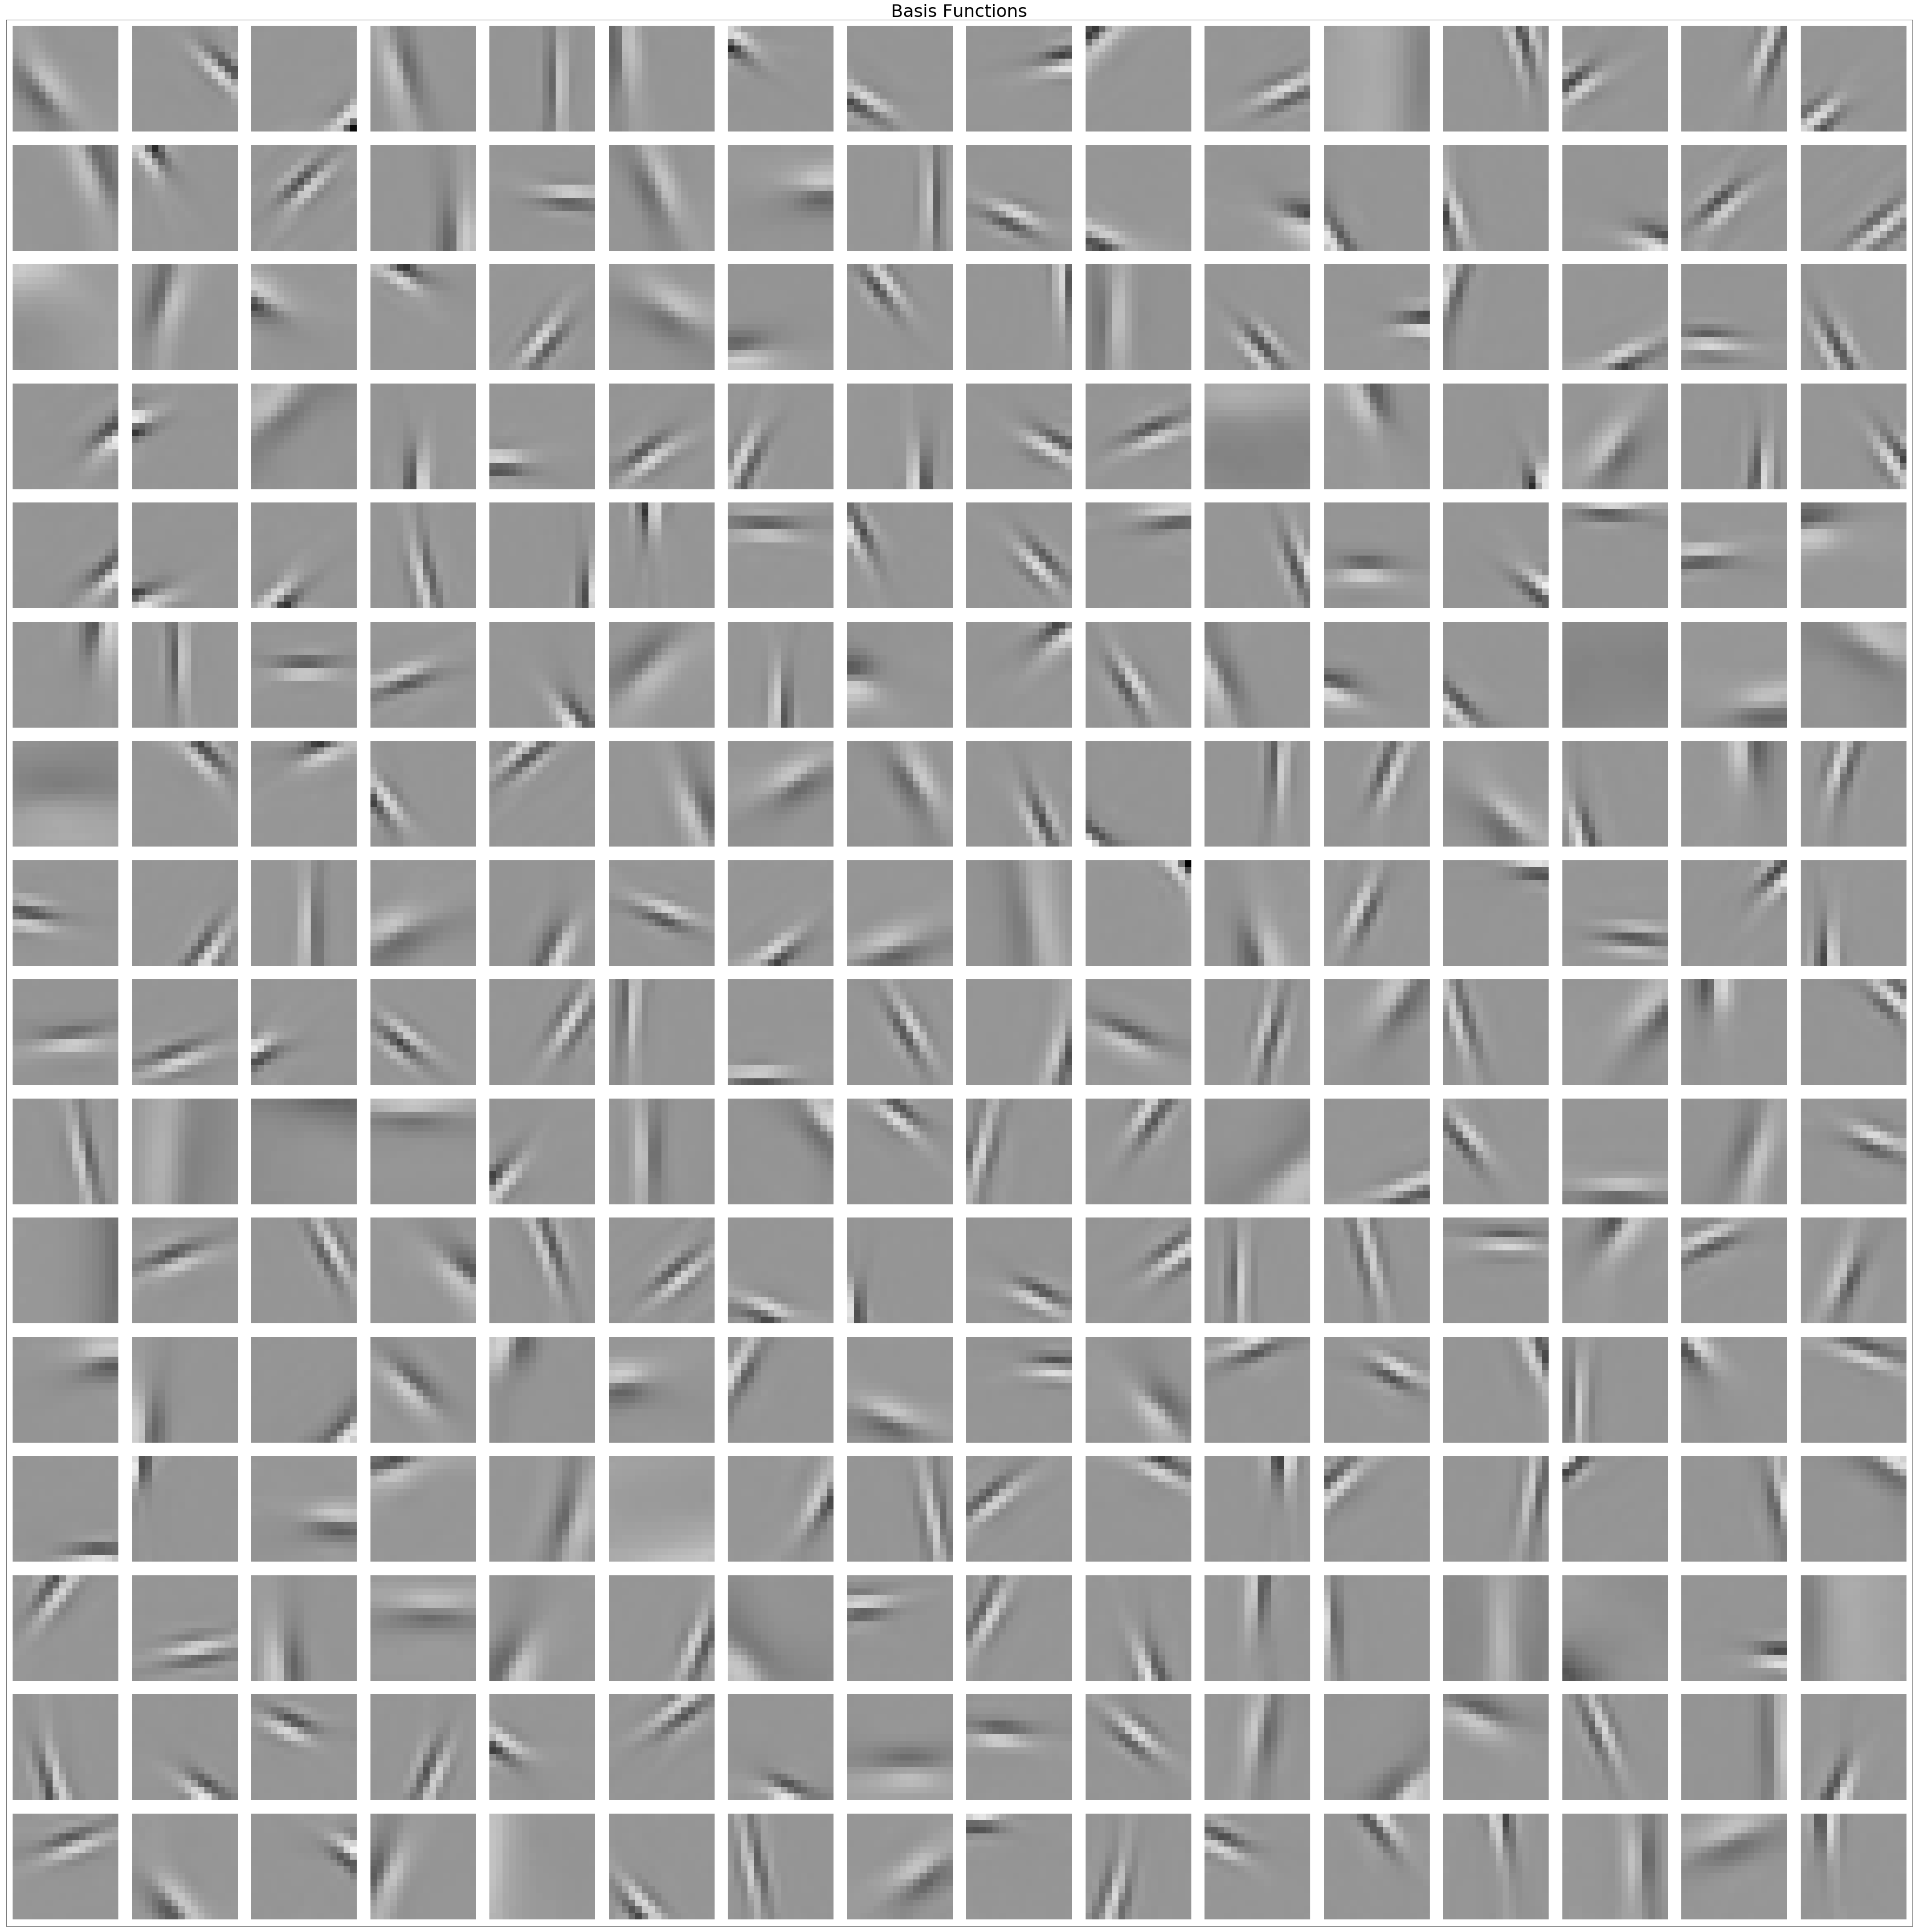

In [4]:
pf.plot_bases(weights)

# Cropping the inverse whitening filter

In [5]:
cropped_unwhite, cropped_lengths, cropped_length_factors, cropped_invw_filter = rd.unwhiten_bases(weights, "crop_filter")

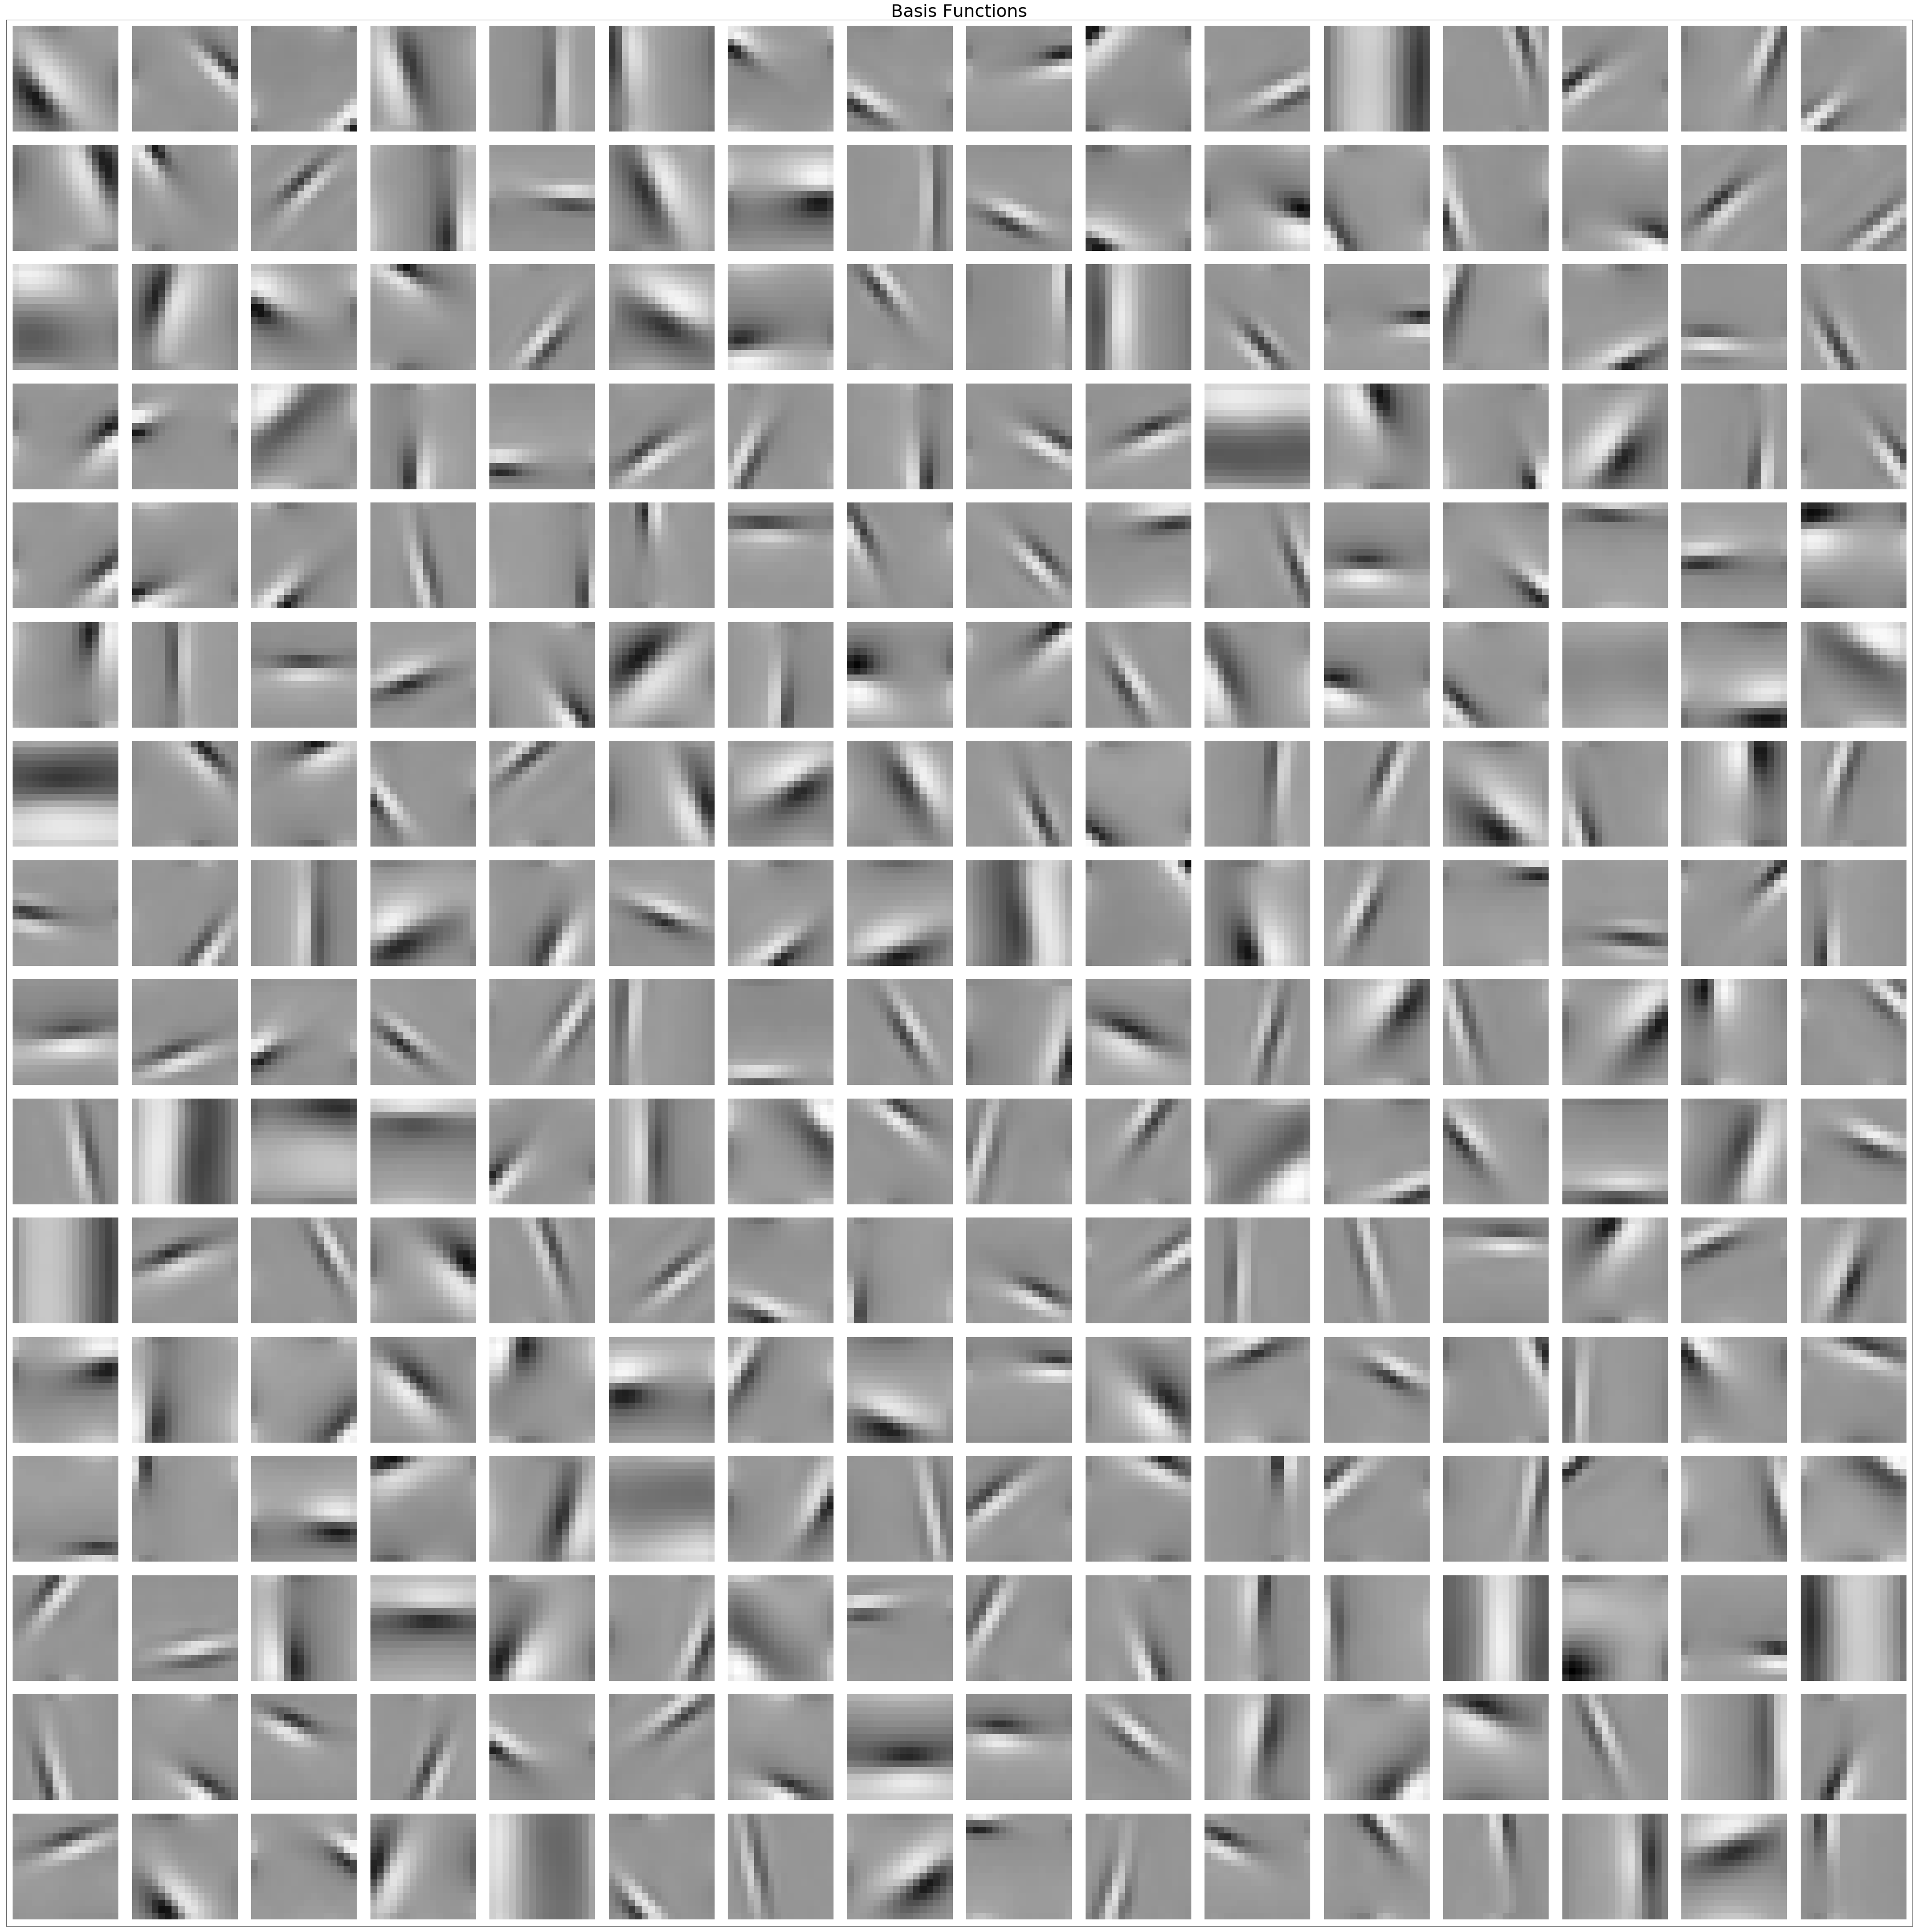

In [6]:
pf.plot_bases(cropped_unwhite)

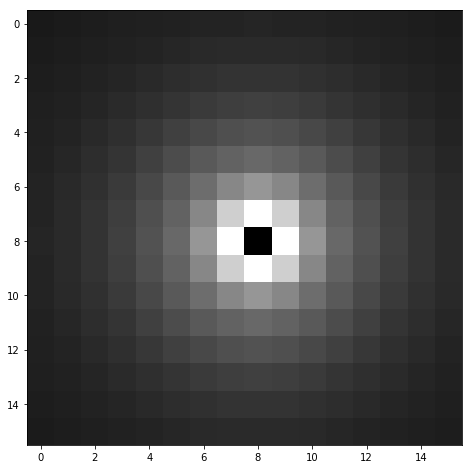

In [7]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(cropped_invw_filter, cmap="Greys_r")

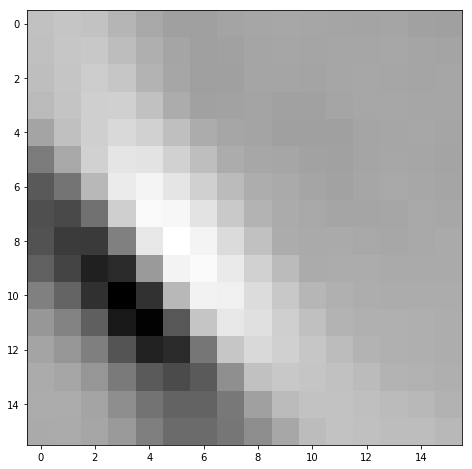

In [30]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(np.reshape(weights.T[0], (16,16)), cmap="Greys_r")

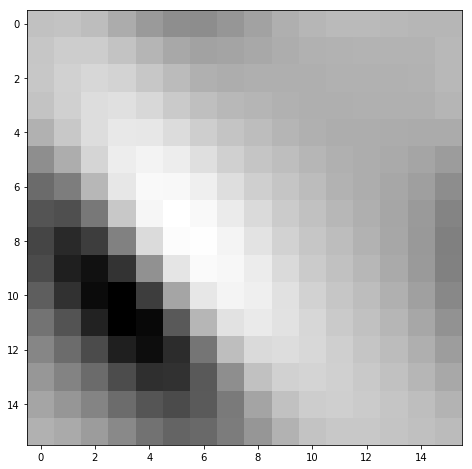

In [31]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(np.reshape(cropped_unwhite.T[0], (16,16)), cmap="Greys_r")

# Padding the basis function

In [12]:
bf = weights.T[19]

In [13]:
padded_bf = np.zeros((1024,1024))

In [15]:
padded_bf[504:520, 504:520] = np.reshape(bf, (16,16))

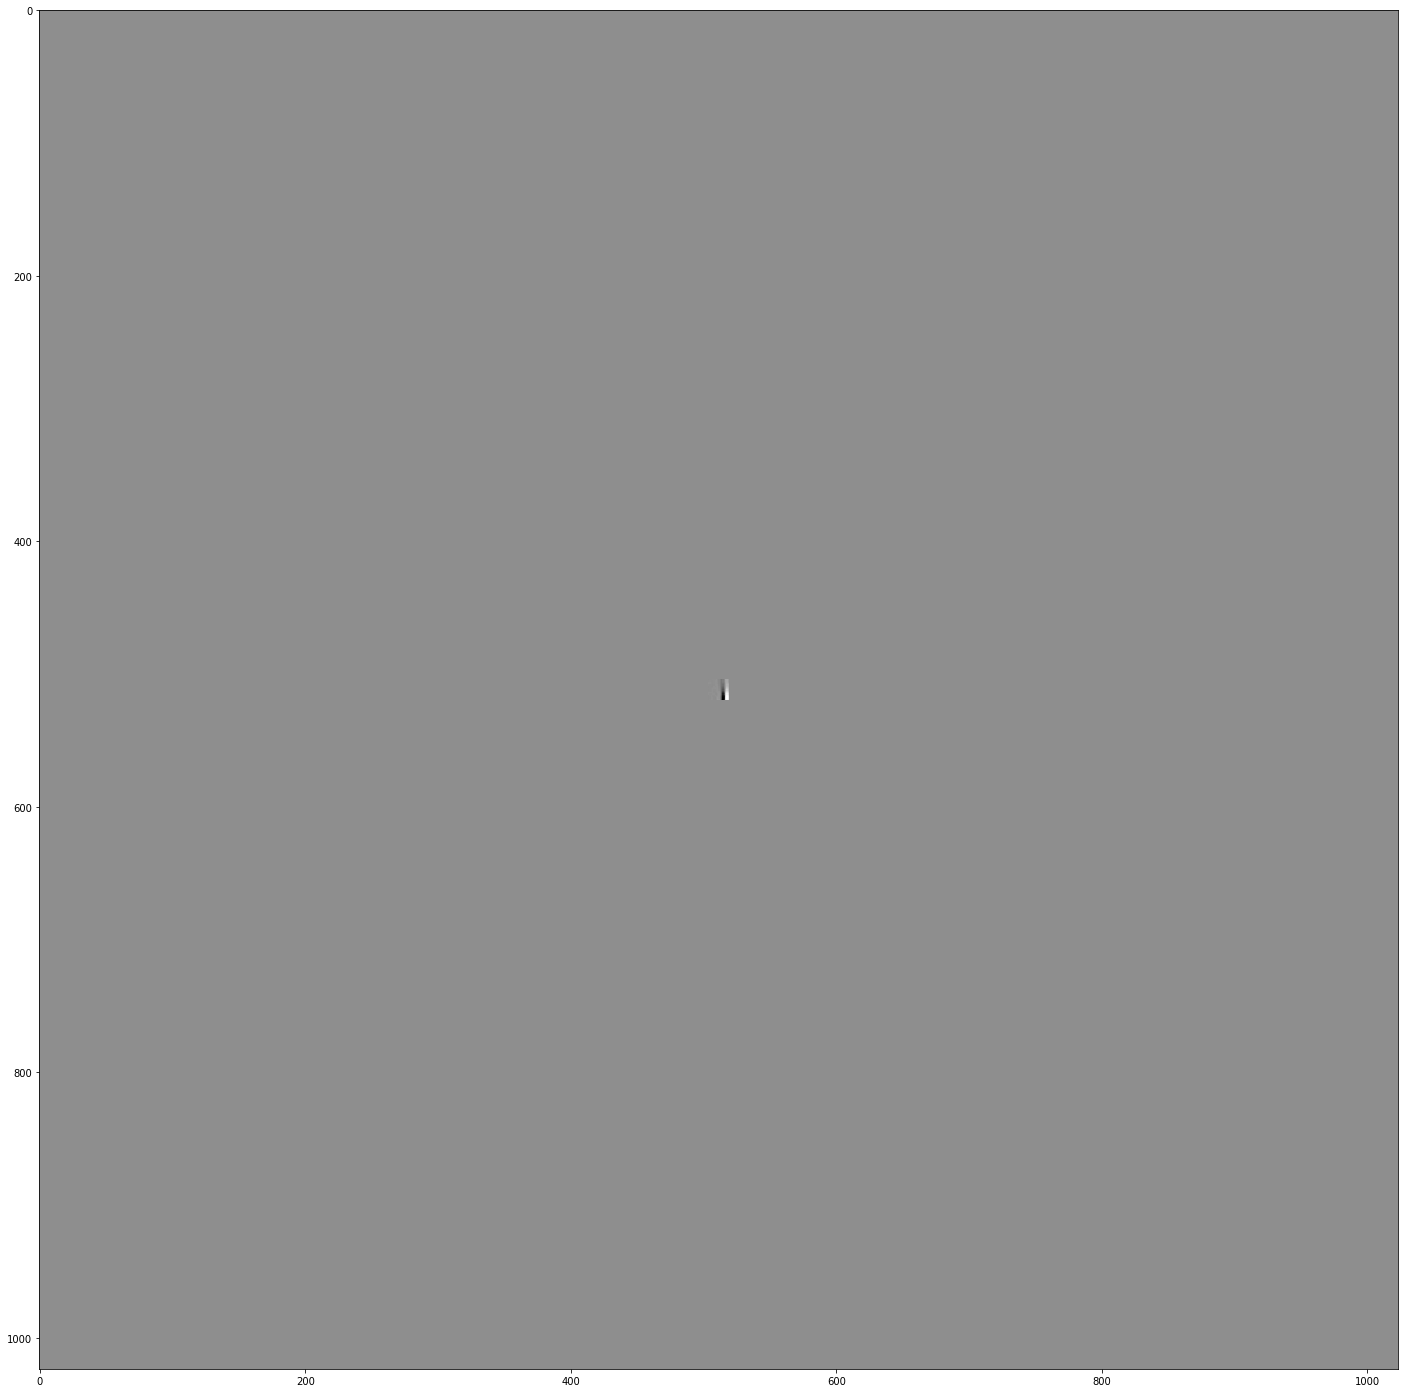

In [16]:
plt.rcParams["figure.figsize"] = [25,25]
plt.imshow(padded_bf, cmap="Greys_r")

In [17]:
unwhite = dp.unwhiten_data(padded_bf[None, ..., None]).squeeze()

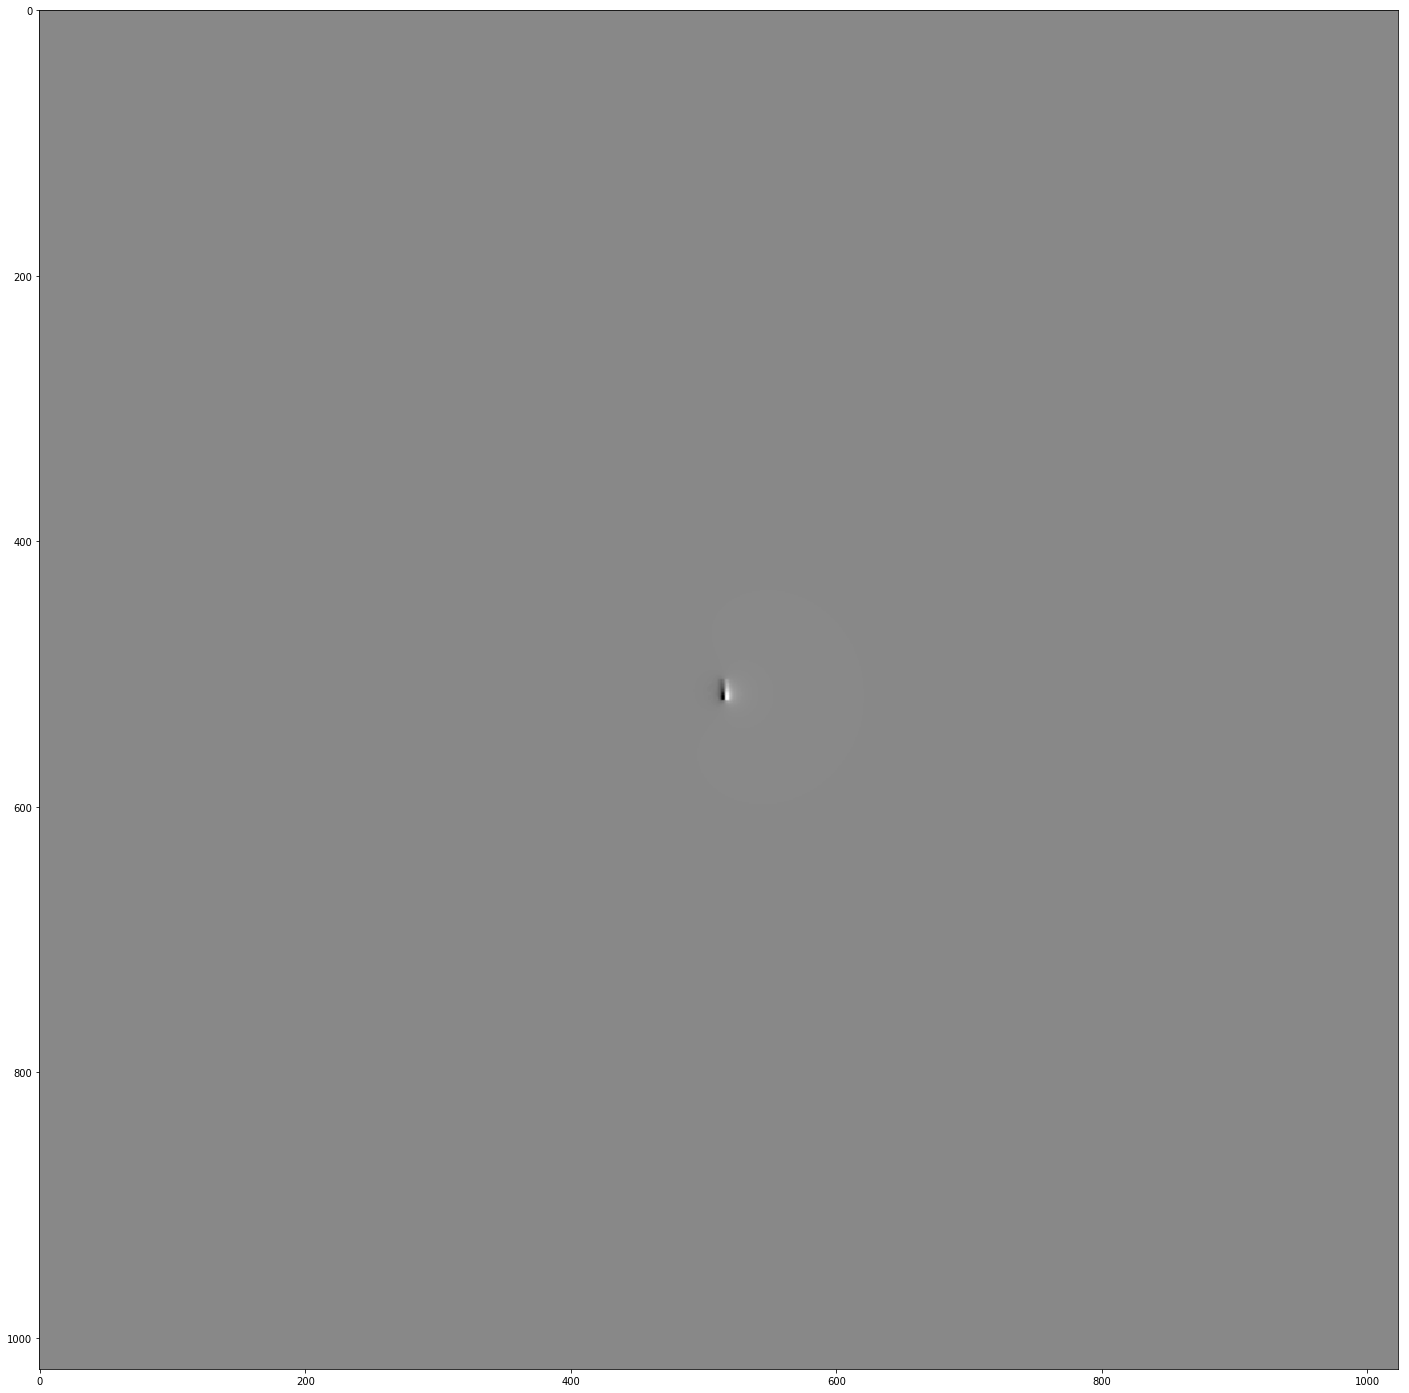

In [18]:
plt.imshow(unwhite, cmap="Greys_r")

In [19]:
np.mean(unwhite)

8.6853964318067906e-24

In [24]:
unwhite, lengths, length_factors, invw_filter = rd.unwhiten_bases(weights, "pad_bf")

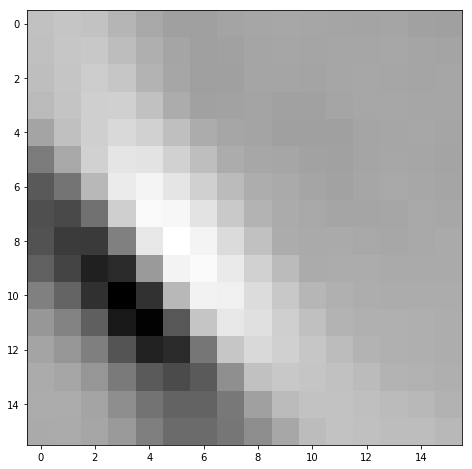

In [20]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(np.reshape(weights.T[0], (16,16)), cmap="Greys_r")

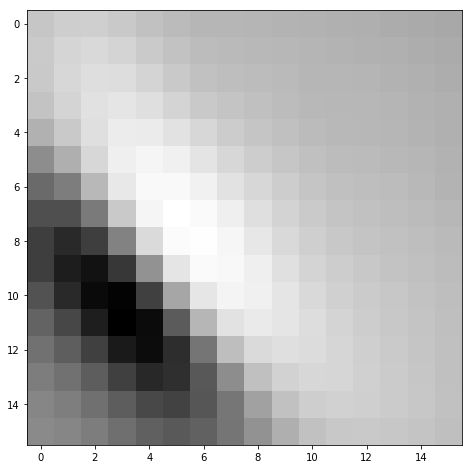

In [25]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(np.reshape(unwhite.T[0], (16,16)), cmap="Greys_r")

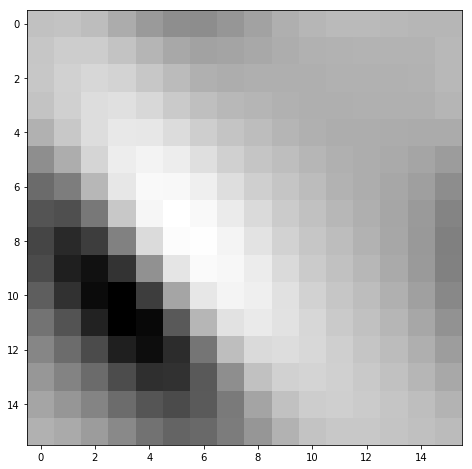

In [32]:
plt.rcParams["figure.figsize"] = [8,8]
plt.imshow(np.reshape(cropped_unwhite.T[0], (16,16)), cmap="Greys_r")

In [27]:
np.linalg.norm(unwhite.T[0])

0.011586822158777205

In [28]:
lengths_idxs = np.array(lengths).argsort()
unwhite_sorted_bfs = unwhite.T[lengths_idxs[::-1]]
sorted_bfs = weights.T[lengths_idxs[::-1]]
sorted_bf_lengths = np.array(lengths)[lengths_idxs[::-1]]

In [29]:
sorted_bf_lengths

array([ 0.04596271,  0.03610728,  0.0300298 ,  0.02998237,  0.02907953,
        0.02838906,  0.02647381,  0.0262914 ,  0.02623878,  0.02493121,
        0.02255098,  0.02031603,  0.0177981 ,  0.01746548,  0.01735   ,
        0.01630998,  0.01452688,  0.01421308,  0.01411734,  0.01374982,
        0.01363226,  0.0126724 ,  0.01249406,  0.01223701,  0.01190151,
        0.01178196,  0.01177158,  0.01169272,  0.01159135,  0.01158682,
        0.0114556 ,  0.01143029,  0.01141672,  0.01115615,  0.01105133,
        0.0110065 ,  0.01099969,  0.01099178,  0.01096816,  0.0108759 ,
        0.01083795,  0.01082614,  0.01077395,  0.01077221,  0.01070166,
        0.01054576,  0.01052773,  0.0103845 ,  0.01029872,  0.01026211,
        0.01023374,  0.01021189,  0.01020175,  0.01011786,  0.01006419,
        0.00987329,  0.00986579,  0.0097784 ,  0.00972478,  0.00966489,
        0.00945888,  0.00943096,  0.00942227,  0.00939467,  0.00935342,
        0.00931514,  0.00919139,  0.0091767 ,  0.0091459 ,  0.00

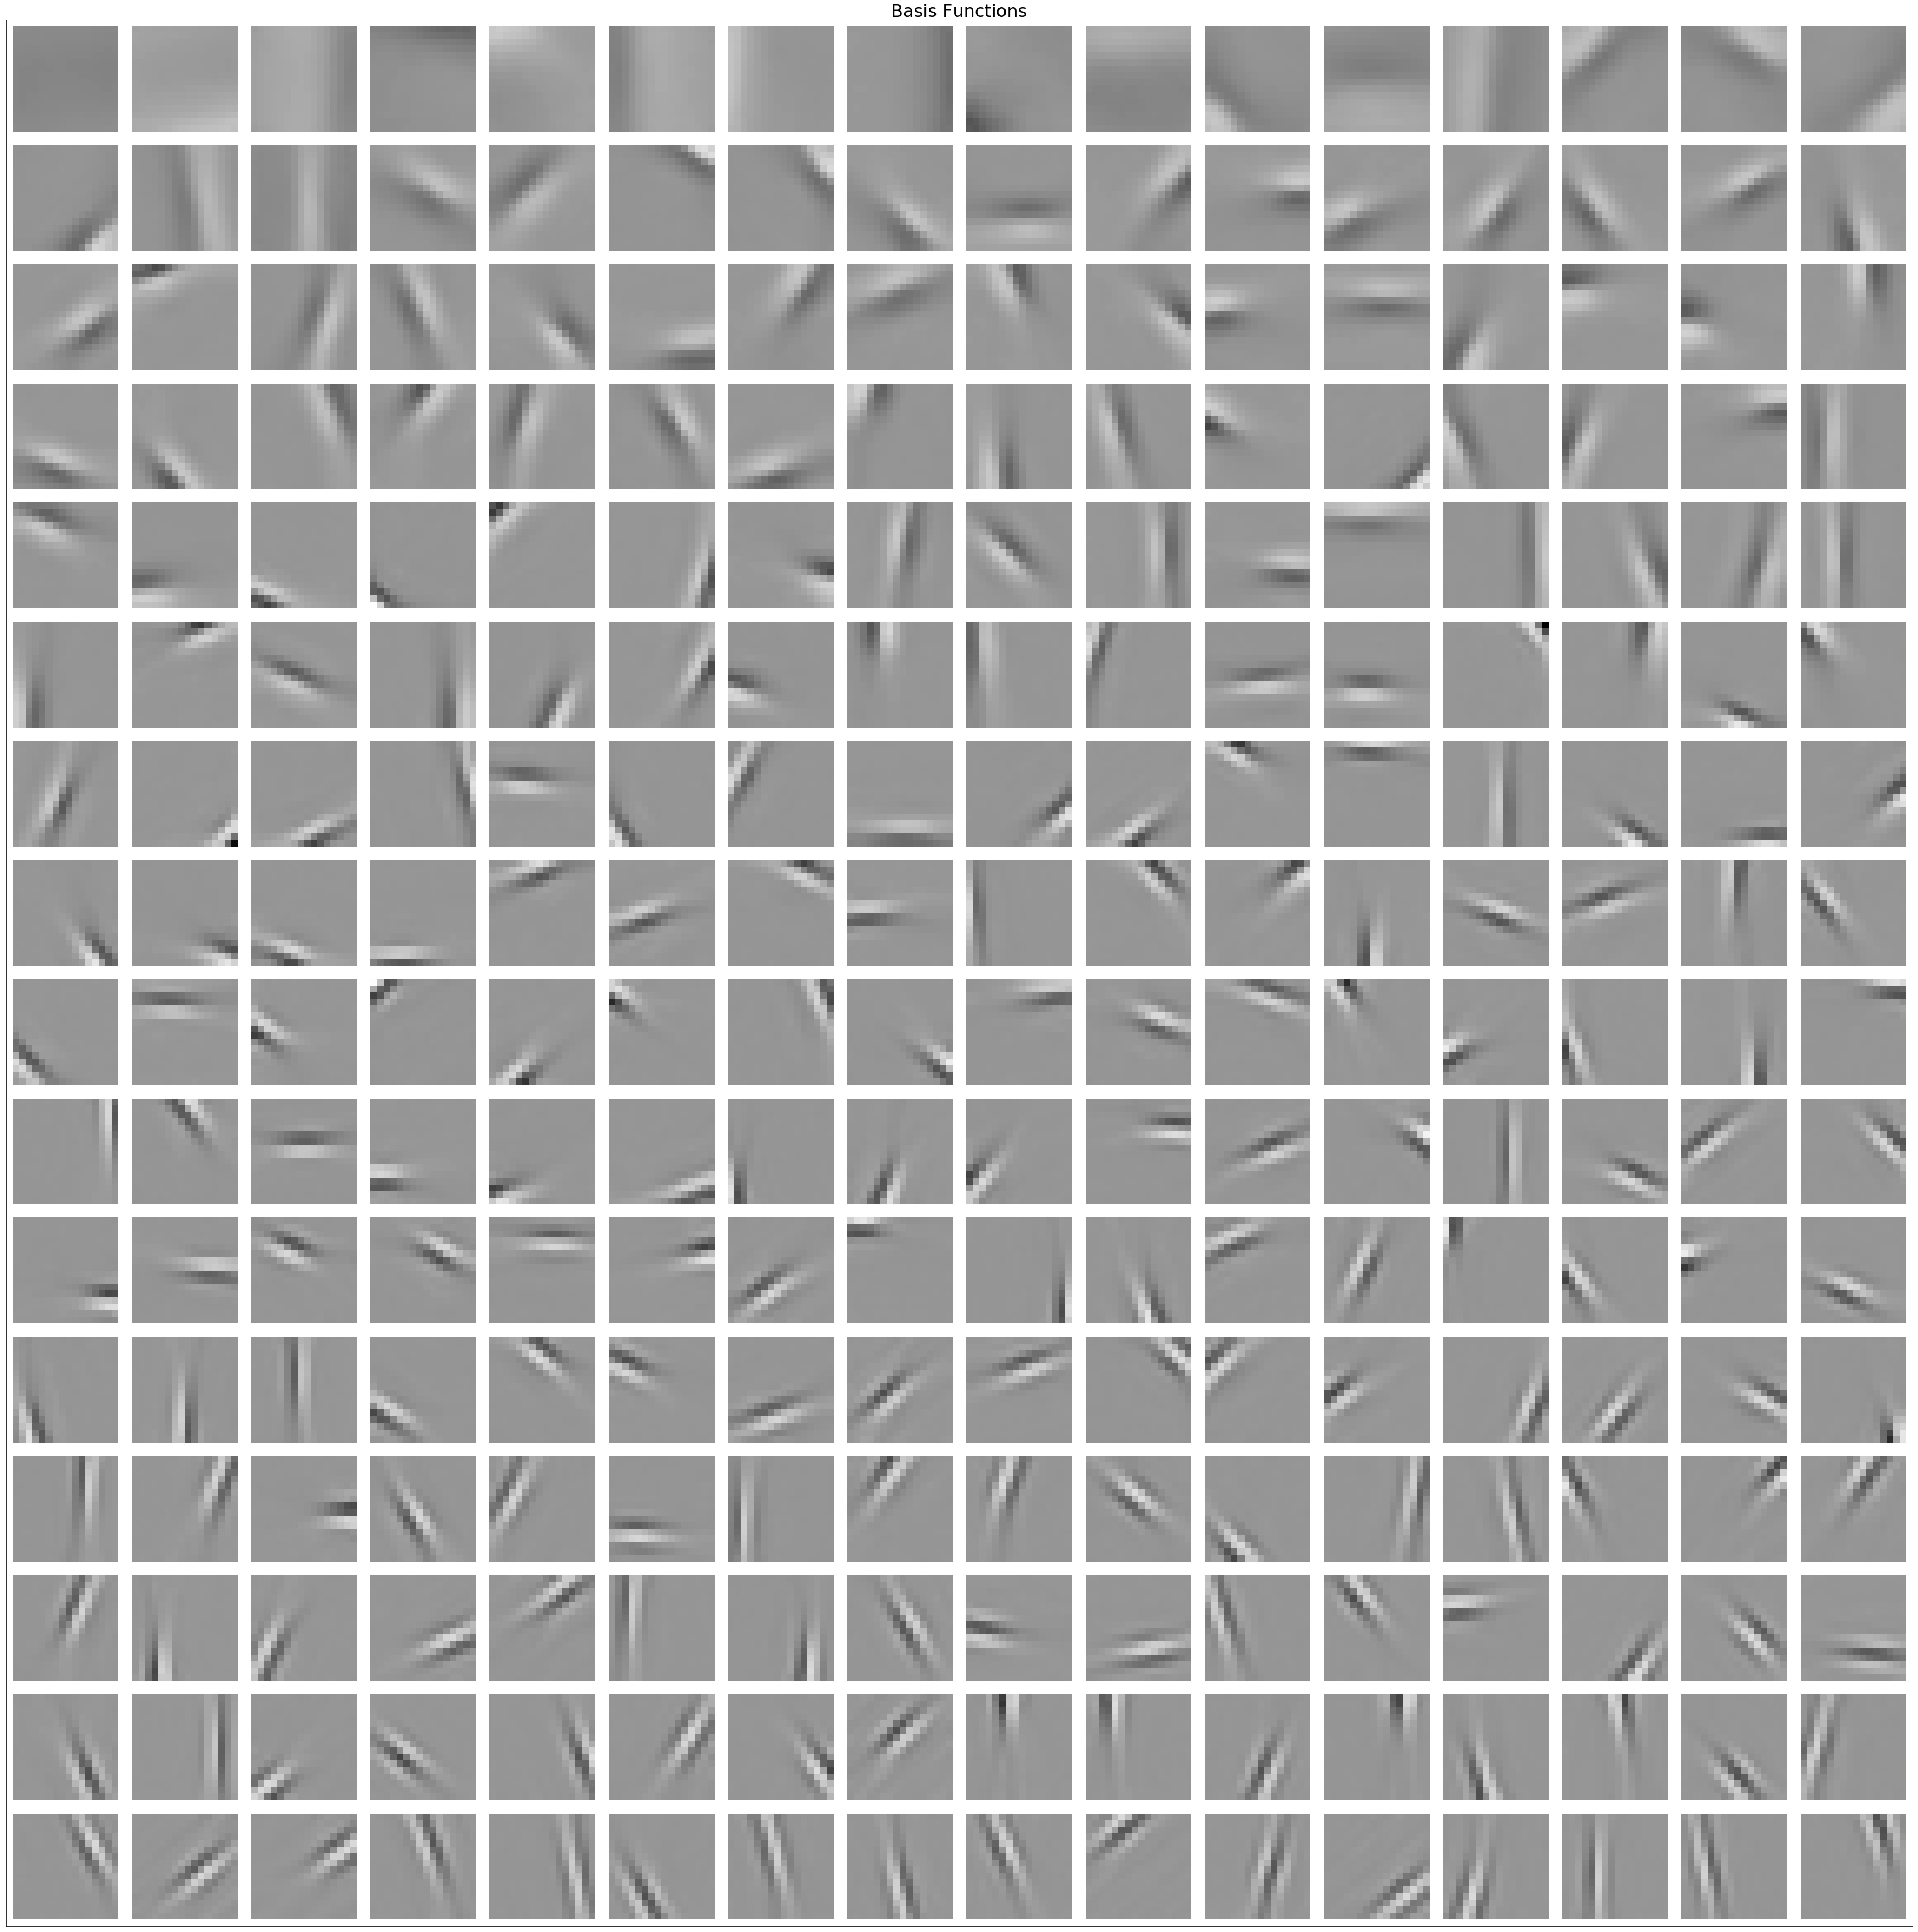

In [30]:
pf.plot_bases(sorted_bfs.T)

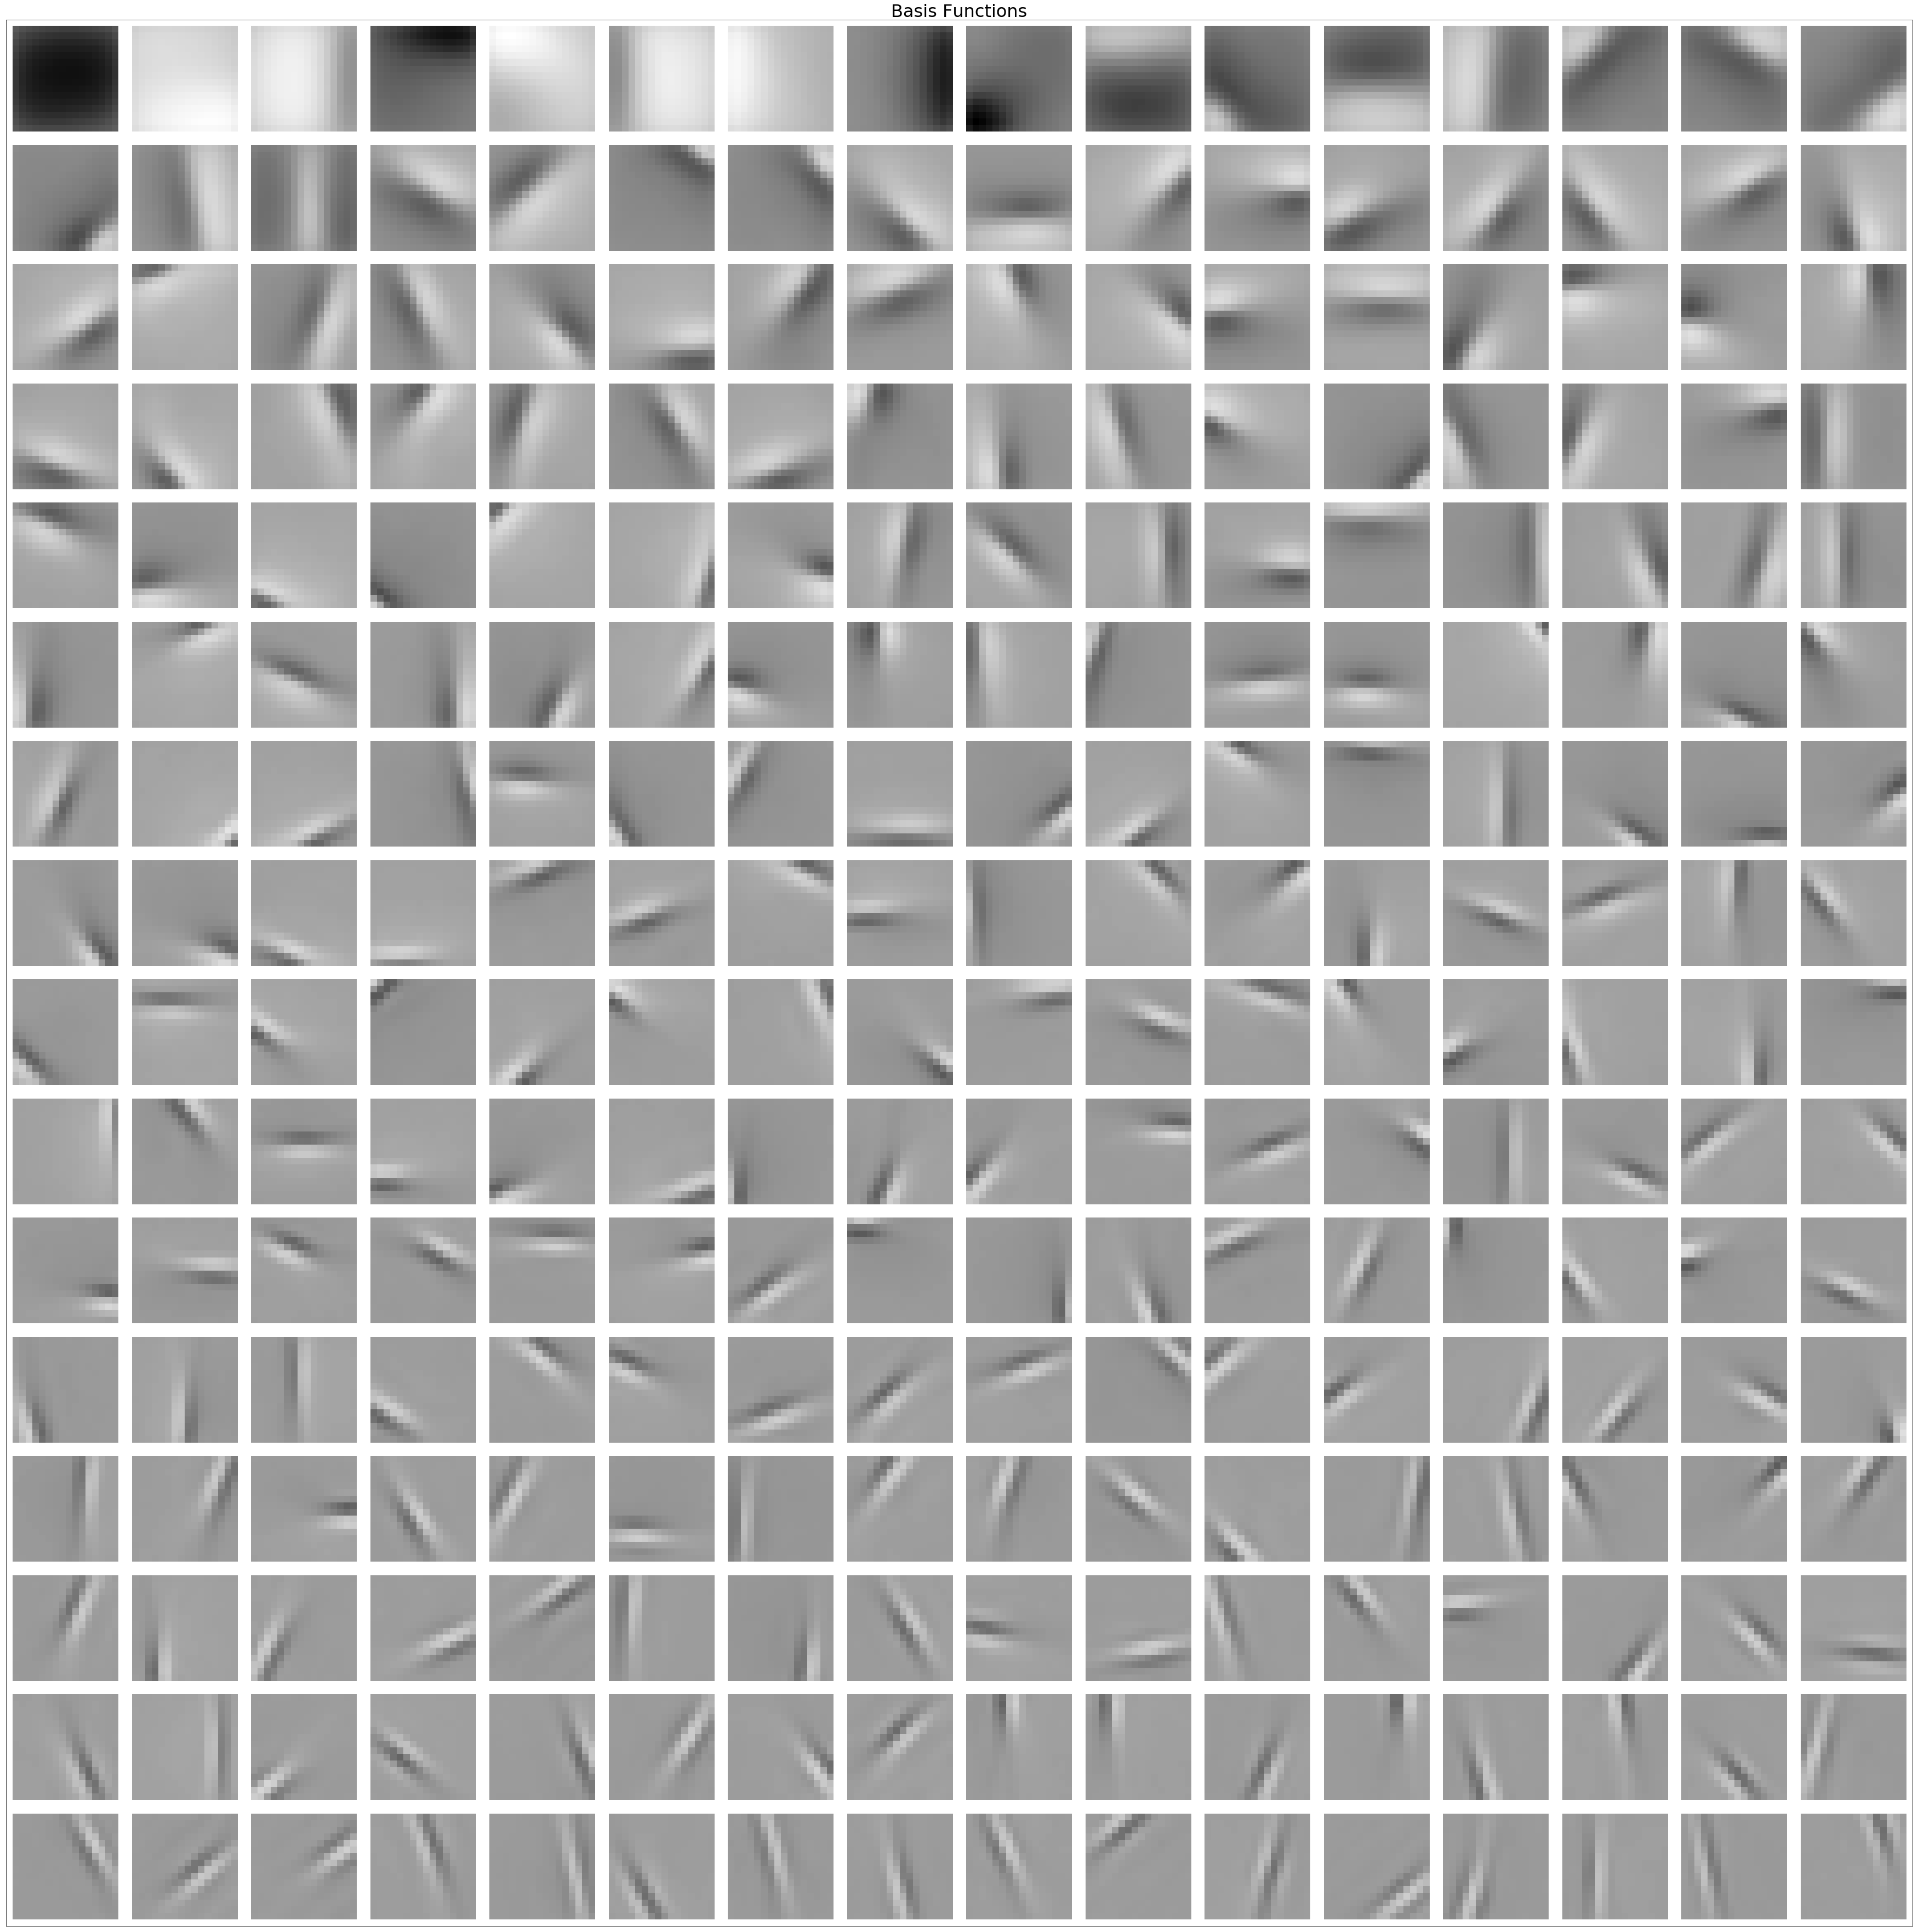

In [31]:
pf.plot_bases(unwhite_sorted_bfs.T)